In [1]:
!pip install html5lib
!pip install webdriver-manager
!pip install python-bcb
!pip install pandas-datareader
!pip install mplfinance
!pip install selenium
!pip install FPDF
!pip install mplcyberpunk
!pip install python-dotenv
!pip install pywin32

ERROR: Could not find a version that satisfies the requirement pywin32 (from versions: none)
ERROR: No matching distribution found for pywin32


In [2]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
from datetime import datetime
from datetime import timedelta
import mplfinance as mpf
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import mplcyberpunk
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import requests
from bcb import currency
from bcb import sgs
from fpdf import FPDF
from matplotlib.dates import date2num
import warnings
warnings.filterwarnings('ignore')

In [3]:
#pegando dados do yahoo finance. 
indices = ['^BVSP', '^GSPC']

hoje = datetime.now()
um_ano_atras = hoje - timedelta(days = 366)

dados_mercado = pdr.get_data_yahoo(indices, start = um_ano_atras, end = hoje)
dados_mercado

Attributes      Adj Close                       Close               \
Symbols             ^BVSP        ^GSPC          ^BVSP        ^GSPC   
Date                                                                 
2021-10-19  110673.000000  4519.629883  110673.000000  4519.629883   
2021-10-20  110786.000000  4536.189941  110786.000000  4536.189941   
2021-10-21  107735.000000  4549.779785  107735.000000  4549.779785   
2021-10-22  106296.000000  4544.899902  106296.000000  4544.899902   
2021-10-25  108715.000000  4566.479980  108715.000000  4566.479980   
...                   ...          ...            ...          ...   
2022-10-14  112072.000000  3583.070068  112072.000000  3583.070068   
2022-10-17  113624.000000  3677.949951  113624.000000  3677.949951   
2022-10-18  115743.000000  3719.979980  115743.000000  3719.979980   
2022-10-19  116274.000000  3695.159912  116274.000000  3695.159912   
2022-10-20  117192.648438  3719.969971  117192.648438  3719.969971   

Attributes           High                        Low               \
Symbols             ^BVSP        ^GSPC         ^BVSP        ^GSPC   
Date                                                                
2021-10-19  114422.000000  4520.399902  109947.00000  4496.410156   
2021-10-20  112023.000000  4540.870117  110176.00000  4524.399902   
2021-10-21  110767.000000  4551.439941  105714.00000  4526.890137   
2021-10-22  107749.000000  4559.669922  102854.00000  4524.000000   
2021-10-25  109372.000000  4572.620117  106296.00000  4537.359863   
...                   ...          ...           ...          ...   
2022-10-14  114712.000000  3712.000000  111631.00000  3579.679932   
2022-10-17  114406.000000  3689.729980  112090.00000  3638.649902   
2022-10-18  115795.000000  3762.790039  113627.00000  3686.530029   
2022-10-19  116459.000000  3728.580078  115264.00000  3666.510010   
2022-10-20  117366.578125  3736.000000  116276.15625  3680.590088   

Attributes          Open                   Volume                
Symbols            ^BVSP        ^GSPC       ^BVSP         ^GSPC  
Date                                                             
2021-10-19  114422.00000  4497.339844  14129200.0  2.531210e+09  
2021-10-20  110677.00000  4524.419922  11735800.0  2.671560e+09  
2021-10-21  110767.00000  4532.240234  16507700.0  3.016950e+09  
2021-10-22  107714.00000  4546.120117  21165700.0  3.062810e+09  
2021-10-25  106298.00000  4553.689941  11512100.0  3.250210e+09  
...                  ...          ...         ...           ...  
2022-10-14  114301.00000  3690.409912  13096100.0  4.243030e+09  
2022-10-17  112107.00000  3638.649902  11633000.0  4.352780e+09  
2022-10-18  113627.00000  3746.260010  14744200.0  4.483740e+09  
2022-10-19  115744.00000  3703.110107  12729900.0  4.223800e+09  
2022-10-20  116276.15625  3689.050049         0.0  8.965740e+08  

[261 rows x 12 columns]

In [4]:
dados_fechamento = dados_mercado['Adj Close']
dados_fechamento.columns = ["Ibov", 'S&P500']
dados_fechamento = dados_fechamento.dropna()

dados_fechamento

,Ibov,S&P500
Date,,
2021-10-19,110673.000000,4519.629883
2021-10-20,110786.000000,4536.189941
2021-10-21,107735.000000,4549.779785
2021-10-22,106296.000000,4544.899902
2021-10-25,108715.000000,4566.479980
...,...,...
2022-10-14,112072.000000,3583.070068
2022-10-17,113624.000000,3677.949951
2022-10-18,115743.000000,3719.979980


In [5]:
dados_anuais = dados_fechamento.resample("Y").last()
display(dados_anuais)
dados_mensais = dados_fechamento.resample("M").last()
display(dados_mensais)

,Ibov,S&P500
Date,,
2021-12-31,104822.000000,4778.729980
2022-12-31,117192.648438,3719.969971


,Ibov,S&P500
Date,,
2021-10-31,103501.000000,4605.379883
2021-11-30,101915.000000,4567.000000
2021-12-31,104822.000000,4778.729980
2022-01-31,112388.000000,4515.549805
2022-02-28,113142.000000,4384.649902
2022-03-31,119999.000000,4530.410156
2022-04-30,107876.000000,4131.930176
2022-05-31,111351.000000,4132.149902
2022-06-30,98542.000000,3785.379883


In [6]:
#calculando rentabilidades

retorno_diario = dados_fechamento.pct_change().dropna()
display('retorno_diario')
display(retorno_diario)

retorno_mes_a_mes = dados_mensais.pct_change().dropna()
retorno_mes_a_mes = retorno_mes_a_mes.iloc[1:,:] #linha 1 (segunda linha) em diante e todas as colunas)
display('retorno_mes_a_mes')
display(retorno_mes_a_mes)

retorno_no_ano = dados_anuais.pct_change().dropna()
display('retorno_no_ano')
display(retorno_no_ano)

'retorno_diario'

,Ibov,S&P500
Date,,
2021-10-20,0.001021,0.003664
2021-10-21,-0.027540,0.002996
2021-10-22,-0.013357,-0.001073
2021-10-25,0.022757,0.004748
2021-10-26,-0.021110,0.001820
...,...,...
2022-10-14,-0.019493,-0.023663
2022-10-17,0.013848,0.026480
2022-10-18,0.018649,0.011428


'retorno_mes_a_mes'

,Ibov,S&P500
Date,,
2021-12-31,0.028524,0.046361
2022-01-31,0.072180,-0.055073
2022-02-28,0.006709,-0.028989
2022-03-31,0.060605,0.033243
2022-04-30,-0.101026,-0.087957
2022-05-31,0.032213,0.000053
2022-06-30,-0.115033,-0.083920
2022-07-31,0.046914,0.091116
2022-08-31,0.061629,-0.042440


'retorno_no_ano'

,Ibov,S&P500
Date,,
2022-12-31,0.118016,-0.221557


In [7]:
#fechamento do dia

fechamento_do_dia = retorno_diario.iloc[-1,:] # ultima linha e todas a colunas
fechamento_do_dia

Ibov      0.007901
S&P500    0.006714
Name: 2022-10-20 00:00:00, dtype: float64

In [8]:
#volatibilidade ibovespa e s&p500
# std -> desvio padrao

volatilidade_12m_ibov = retorno_diario['Ibov'].std()*np.sqrt(252)
volatilidade_12m_sp = retorno_diario['S&P500'].std()*np.sqrt(252)

display(volatilidade_12m_ibov)
display(volatilidade_12m_sp)

0.20313575920870924

0.23081123753122637

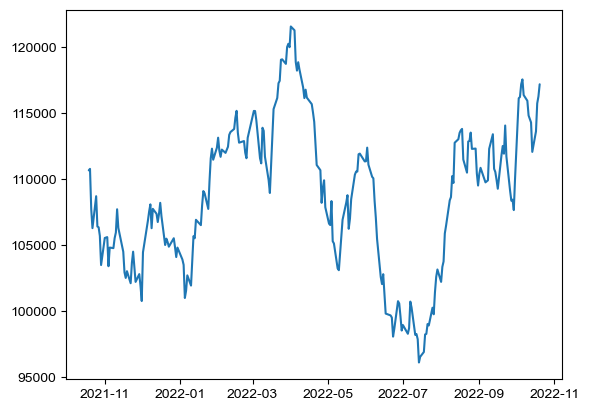

In [9]:
#hora dos gráficos
fig, ax = plt.subplots()

plt.style.use("cyberpunk")

ax.plot(dados_fechamento.index, dados_fechamento['Ibov'])
ax.grid(False)
plt.savefig('ibov.png', dpi = 300)

plt.show()



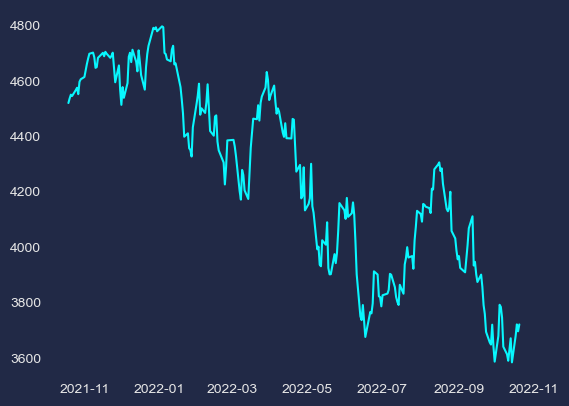

In [10]:
fig, ax = plt.subplots()

plt.style.use("cyberpunk")

ax.plot(dados_fechamento.index, dados_fechamento['S&P500'])
ax.grid(False)
plt.savefig('sp.png', dpi = 300)

plt.show()

In [11]:
#DADOS DI
dados_fechamento


,Ibov,S&P500
Date,,
2021-10-19,110673.000000,4519.629883
2021-10-20,110786.000000,4536.189941
2021-10-21,107735.000000,4549.779785
2021-10-22,106296.000000,4544.899902
2021-10-25,108715.000000,4566.479980
...,...,...
2022-10-14,112072.000000,3583.070068
2022-10-17,113624.000000,3677.949951
2022-10-18,115743.000000,3719.979980


In [12]:
data_inicial = dados_fechamento.index[0]

if datetime.now().hour < 10:
    data_final = dados_fechamento.index[-1]
else:
    data_final = dados_fechamento.index[-2]
    
print(data_inicial)

data_inicial = data_inicial.strftime("%d/%m/%Y")
data_final = data_final.strftime("%d/%m/%Y")

print(data_final)

2021-10-19 00:00:00
19/10/2022


In [13]:
url_mais_att = f'''http://www2.bmf.com.br/pages/portal/bmfbovespa/boletim1/SistemaPregao1.asp?
pagetype=pop&caminho=Resumo%20Estat%EDstico%20-%20Sistema%20Preg%E3o&Data={data_final}
&Mercadoria=DI1'''

url_mais_antiga = f'''http://www2.bmf.com.br/pages/portal/bmfbovespa/boletim1/SistemaPregao1.asp?
pagetype=pop&caminho=Resumo%20Estat%EDstico%20-%20Sistema%20Preg%E3o&Data={data_inicial}
&Mercadoria=DI1'''

url_mais_antiga

'http://www2.bmf.com.br/pages/portal/bmfbovespa/boletim1/SistemaPregao1.asp?\npagetype=pop&caminho=Resumo%20Estat%EDstico%20-%20Sistema%20Preg%E3o&Data=19/10/2021\n&Mercadoria=DI1'

In [14]:
def pegando_dados_di(url):
    
    driver = webdriver.Chrome(options=Options())
    
    sem_conexao = True
    
    while sem_conexao:
        try:
            driver.get(url)
            sem_conexao = False
        except:
            pass
            

    local_tabela = '''
    //div[@id = "containerPop"]//div[@id = "pageContent"]//form//table//tbody//tr[3]//td[3]//table
    '''
    local_indice = '''
    //div[@id = "containerPop"]//div[@id = "pageContent"]//form//table//tbody//tr[3]//td[1]//table
    '''

    elemento = driver.find_element("xpath", local_tabela)
    elemento_indice = driver.find_element("xpath", local_indice)

    html_tabela = elemento.get_attribute('outerHTML')
    html_indice = elemento_indice.get_attribute('outerHTML')

    driver.quit()

    tabela = pd.read_html(html_tabela)[0]
    indice = pd.read_html(html_indice)[0]

    return tabela, indice
    

 

In [15]:
di_mais_recente, indice_mais_recente = pegando_dados_di(url = url_mais_att)


di_mais_antigo, indice_mais_antigo = pegando_dados_di(url = url_mais_antiga)


In [16]:
display(di_mais_recente, indice_mais_recente)
display(di_mais_antigo, indice_mais_antigo)

,0,1,2,3,4,5,6,7,8,9,10
0,AJUSTE ANTER. (3),AJUSTE CORRIG. (4),PREÇO ABERT.,PREÇO MÍN.,PREÇO MÁX.,PREÇO MÉD.,ÚLT. PREÇO,AJUSTE,VAR. PTOS.,ÚLT. OF. COMPRA,ÚLT. OF. VENDA
1,"99.543,92","99.543,92",13654,13654,13660,13656,13660,"99.543,94","0,02+",13654,13660
2,"98.537,06","98.537,06",13664,13660,13668,13664,13668,"98.536,91","0,15-",13660,13668
3,"97.438,39","97.438,39",13678,13674,13682,13678,13682,"97.438,16","0,23-",13680,13682
4,"96.351,30","96.351,30",13695,13685,13695,13689,13690,"96.351,94","0,64+",13685,13690
5,"95.472,31","95.472,31",13690,13680,13690,13681,13680,"95.474,57","2,26+",13680,13690
6,"94.364,60","94.364,60",13680,13675,13690,13682,13685,"94.362,83","1,77-",13685,13690
7,"93.508,66","93.508,66",13660,13660,13675,13674,13675,"93.511,75","3,09+",13665,13680
8,"92.501,05","92.501,05",13615,13600,13630,13613,13630,"92.500,41","0,64-",13600,13635
9,"91.565,21","91.565,21",13535,13530,13550,13540,13545,"91.559,24","5,97-",13540,13545


,0
0,VENCTO
1,X22
2,Z22
3,F23
4,G23
5,H23
6,J23
7,K23
8,M23
9,N23


,0,1,2,3,4,5,6,7,8,9,10
0,AJUSTE ANTER. (3),AJUSTE CORRIG. (4),PREÇO ABERT.,PREÇO MÍN.,PREÇO MÁX.,PREÇO MÉD.,ÚLT. PREÇO,AJUSTE,VAR. PTOS.,ÚLT. OF. COMPRA,ÚLT. OF. VENDA
1,"99.778,94","99.778,94",6376,6376,6422,6416,6420,"99.777,95","0,99-",6406,6422
2,"99.230,32","99.230,32",6980,6980,7118,7066,7072,"99.216,73","13,59-",7002,7070
3,"98.535,79","98.535,79",7444,7444,7622,7521,7574,"98.502,87","32,92-",7572,7574
4,"97.887,12","97.887,12",7770,7745,7855,7805,7815,"97.833,31","53,81-",7800,0000
5,"97.247,67","97.247,67",8050,8050,8200,8154,8180,"97.159,18","88,49-",8200,0000
6,"96.492,24","96.492,24",8250,8250,8600,8449,8530,"96.356,66","135,58-",8530,8540
7,"95.817,35","95.817,35",8610,8580,8800,8722,8730,"95.645,82","171,53-",0000,0000
8,"95.028,89","95.028,89",8900,8900,9075,8975,9025,"94.814,95","213,94-",0000,0000
9,"94.279,54","94.279,54",8980,8905,9255,9067,9185,"94.020,27","259,27-",9175,9190


,0
0,VENCTO
1,X21
2,Z21
3,F22
4,G22
5,H22
6,J22
7,K22
8,M22
9,N22


In [17]:
def tratando_dados_di(df_dados, indice):
    
    df_dados.columns = df_dados.loc[0]

    df_dados = df_dados['ÚLT. PREÇO']

    df_dados = df_dados.drop(0, axis = 0)

    indice.columns = indice.loc[0]

    indice_di = indice['VENCTO']

    indice = indice.drop(0, axis = 0)
    
    df_dados.index = indice['VENCTO']
    
    print(df_dados)
    
    df_dados = df_dados.astype(int)

    df_dados = df_dados[df_dados != 0]

    df_dados = df_dados/1000
    
    print(df_dados)

    return df_dados

In [18]:
dados_di_recente_tratado = tratando_dados_di(di_mais_recente, indice_mais_recente)

dados_di_antigo_tratado = tratando_dados_di(di_mais_antigo, indice_mais_antigo)

VENCTO
X22    13660
Z22    13668
F23    13682
G23    13690
H23    13680
J23    13685
K23    13675
M23    13630
N23    13545
Q23    13465
U23    13350
V23    13240
F24    12870
J24    12525
N24    12170
V24    11920
F25    11695
J25    11600
N25    11555
V25    11550
F26    11550
J26    11555
N26    11560
V26    11565
F27    11555
J27    11570
N27    11485
V27    11585
F28    11590
F29    11690
F30    11740
F31    11770
F32    11750
F33    11790
F34     0000
F35     0000
F36     0000
F37     0000
Name: ÚLT. PREÇO, dtype: object
VENCTO
X22    13.660
Z22    13.668
F23    13.682
G23    13.690
H23    13.680
J23    13.685
K23    13.675
M23    13.630
N23    13.545
Q23    13.465
U23    13.350
V23    13.240
F24    12.870
J24    12.525
N24    12.170
V24    11.920
F25    11.695
J25    11.600
N25    11.555
V25    11.550
F26    11.550
J26    11.555
N26    11.560
V26    11.565
F27    11.555
J27    11.570
N27    11.485
V27    11.585
F28    11.590
F29    11.690
F30    11.740
F31    11.770
F32    11.75

In [19]:
legenda = pd.Series(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                    index = ['F', 'G', 'H', 'J', 'K', 'M', 'N', 'Q', 'U', 'V', 'X', 'Z'])

legenda
legenda["F"]

'Jan'

In [20]:
def transformando_codigo_em_data(df):

    lista_datas = []

    for indice in df.index:

        letra = indice[0]
        
        ano = indice[1:3]

        mes = legenda[letra]

        data = f"{mes}-{ano}"

        data = datetime.strptime(data, "%b-%y")

        lista_datas.append(data)
        

    df.index = lista_datas  
    
    return df

In [21]:
dados_di_recente_tratado = transformando_codigo_em_data(dados_di_recente_tratado)
dados_di_antigo_tratado = transformando_codigo_em_data(dados_di_antigo_tratado)

dados_di_recente_tratado

2022-11-01    13.660
2022-12-01    13.668
2023-01-01    13.682
2023-02-01    13.690
2023-03-01    13.680
2023-04-01    13.685
2023-05-01    13.675
2023-06-01    13.630
2023-07-01    13.545
2023-08-01    13.465
2023-09-01    13.350
2023-10-01    13.240
2024-01-01    12.870
2024-04-01    12.525
2024-07-01    12.170
2024-10-01    11.920
2025-01-01    11.695
2025-04-01    11.600
2025-07-01    11.555
2025-10-01    11.550
2026-01-01    11.550
2026-04-01    11.555
2026-07-01    11.560
2026-10-01    11.565
2027-01-01    11.555
2027-04-01    11.570
2027-07-01    11.485
2027-10-01    11.585
2028-01-01    11.590
2029-01-01    11.690
2030-01-01    11.740
2031-01-01    11.770
2032-01-01    11.750
2033-01-01    11.790
Name: ÚLT. PREÇO, dtype: float64

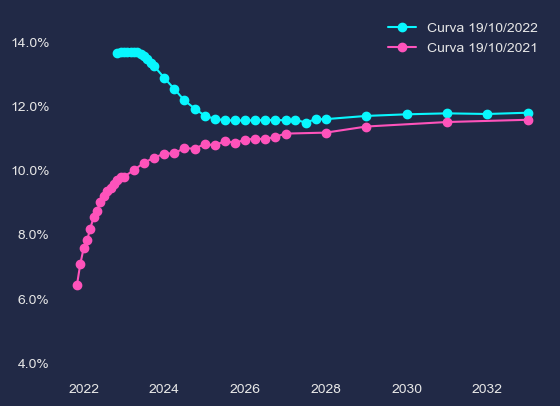

In [22]:
fig, ax = plt.subplots()


plt.style.use("cyberpunk")
ax.set_ylim(3.5, 15)
ax.plot(dados_di_recente_tratado.index, dados_di_recente_tratado.values, 
                                    label = f"Curva {data_final}", marker='o')
ax.plot(dados_di_antigo_tratado.index, dados_di_antigo_tratado.values, 
        label = f"Curva {data_inicial}", marker='o')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()
ax.grid(False)
plt.savefig('juros.png', dpi = 300)

plt.show()

In [23]:
#serie selic

selic = sgs.get({'selic':432}, start = '2010-01-01')
selic

,selic
Date,
2010-01-01,8.75
2010-01-02,8.75
2010-01-03,8.75
2010-01-04,8.75
2010-01-05,8.75
...,...
2022-10-16,13.75
2022-10-17,13.75
2022-10-18,13.75


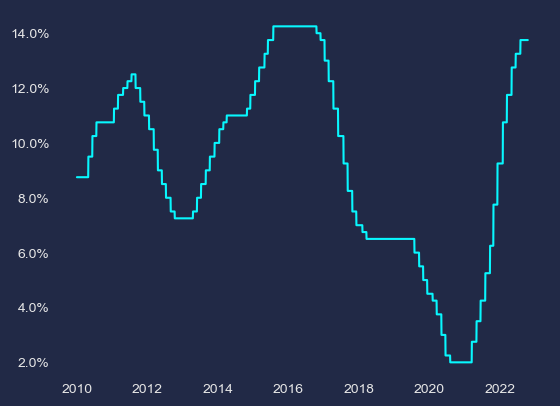

In [24]:
fig, ax = plt.subplots()

plt.style.use("cyberpunk")

ax.plot(selic.index, selic['selic'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.grid(False)
plt.savefig('selic.png', dpi=300)

plt.show()

In [25]:
#serie do IPCA e inflação

inflacao = sgs.get({'ipca': 433, 'igp-m': 189}, start = um_ano_atras + timedelta(180))

inflacao

,ipca,igp-m
Date,,
2022-04-01,1.06,1.41
2022-05-01,0.47,0.52
2022-06-01,0.67,0.59
2022-07-01,-0.68,0.21
2022-08-01,-0.36,-0.70
2022-09-01,-0.29,-0.95


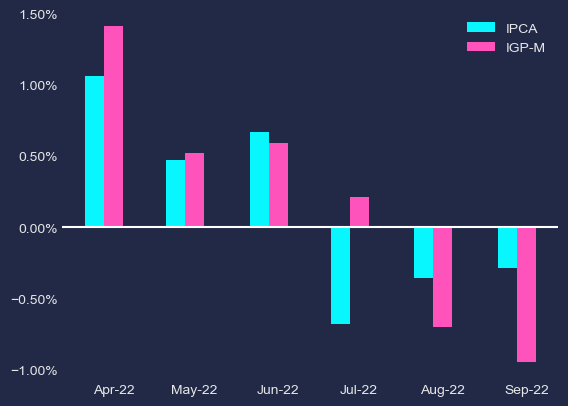

In [26]:
datas_numericas = date2num(inflacao.index)

fig, ax = plt.subplots()

ax.bar(datas_numericas-7, inflacao['ipca'], label = "IPCA", width=7)
ax.bar(datas_numericas, inflacao['igp-m'], label = "IGP-M", width=7)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis_date()
formato_data = mdates.DateFormatter('%b-%y')
ax.xaxis.set_major_formatter(formato_data)
ax.grid(False)
plt.axhline(y=0, color='w')
plt.legend()
plt.savefig('inflacao.png', dpi=300)

plt.show()

In [27]:
dolar = currency.get('USD', start=um_ano_atras, end=datetime.now())
dolar

,USD
Date,
2021-10-19,5.5521
2021-10-20,5.5571
2021-10-21,5.6423
2021-10-22,5.7117
2021-10-25,5.5973
...,...
2022-10-13,5.3017
2022-10-14,5.2824
2022-10-17,5.2713


In [28]:
dolar_mensal = dolar.resample("M").last()
dolar_anual = dolar.resample("Y").last()

In [29]:
#calculando rentabilidades

dolar_diario = dolar.pct_change().dropna()
fechamento_dia_dolar = dolar_diario.iloc[-1,:]

display(fechamento_dia_dolar)

retorno_mes_a_mes_dolar = dolar_mensal.pct_change().dropna()
retorno_mes_a_mes_dolar = retorno_mes_a_mes_dolar.iloc[1:,:]

display(retorno_mes_a_mes_dolar)

retorno_no_ano_dolar = dolar_anual.pct_change().dropna()

display(retorno_no_ano_dolar)

USD    0.002106
Name: 2022-10-19 00:00:00, dtype: float64

,USD
Date,
2021-12-31,-0.007011
2022-01-31,-0.039978
2022-02-28,-0.040691
2022-03-31,-0.078141
2022-04-30,0.038267
2022-05-31,-0.038666
2022-06-30,0.107657
2022-07-31,-0.009469
2022-08-31,-0.001812


,USD
Date,
2022-12-31,-0.053705


In [30]:
#volatilidade dolar

volatilidade_12m_dolar = dolar_diario['USD'].std()*np.sqrt(252)
volatilidade_12m_dolar

0.1484474515365215

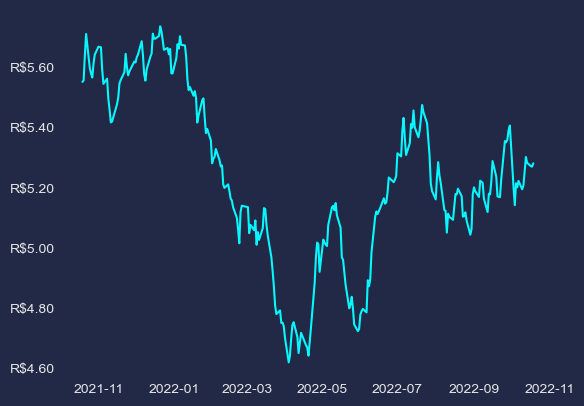

In [31]:
fig, ax = plt.subplots()

plt.style.use('cyberpunk')

ax.plot(dolar.index, dolar['USD'])
ax.yaxis.set_major_formatter('R${x:1.2f}')
ax.grid(False)
plt.savefig("dolar.png", dpi=300)

plt.show()

In [32]:
#CRIAR PDF

meses = []

for indice in retorno_mes_a_mes.index:
    mes = indice.strftime("%b")
    meses.append(mes)
meses

['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']

In [33]:
class PDF(FPDF):
    
    def header(self):
        
        self.image('logo.png', 10, 8, 40)
        self.set_font('Arial', 'B', 20)
        self.ln(15)
        self.set_draw_color(35, 155, 132) #cor RGB
        self.cell(15, ln = False)
        self.cell(150, 15, f"Relatório de mercado {data_final}", 
                  border = True, ln = True, align = "C")
        self.ln(5)
        
    def footer(self):
        
        self.set_y(-15) #espaço ate o final da folha
        self.set_font('Arial', 'I', 10)
        self.cell(0, 10, f"{self.page_no()}/{{nb}}", align = "C")

In [34]:
#Definindo config básicas do PDF

pdf = PDF("P", "mm", "Letter")
pdf.set_auto_page_break(auto = True, margin = 15)
pdf.alias_nb_pages()
pdf.add_page()
pdf.set_fill_color(255, 255, 255)
pdf.set_draw_color(35, 155, 132)

#pdf.output('aula2.pdf')



In [35]:
pdf.image('nave1.png', x = 115, y = 70, w = 75, h = 33, type = '', link = '')

pdf.set_font('Arial', 'B', 18)
pdf.cell(0,10, "1- Ações e câmbio", ln = True, border = False, fill = False)
pdf.ln(2)

pdf.set_font('Arial', '', 14)
pdf.cell(0,15, "1.1 Fechamento do Mercado", ln = True, border = False, fill = False)

pdf.ln(7)

#pdf.output('aula2.pdf')

In [36]:
#fechamento ibov
pdf.set_font('Arial', '', 13)
pdf.cell(25, 15, " Ibovespa", ln = False,  border = True, fill = True)
pdf.cell(20, 15, f" {str(round(fechamento_do_dia[0] * 100, 2))}%", ln = True, 
         border = True, fill = False)

#fechamento s&p500
pdf.cell(25, 15, " S&P500", ln = False,  border = True, fill = True)
pdf.cell(20, 15, f" {str(round(fechamento_do_dia[1] * 100, 2))}%", ln = True,  border = True, fill = False)

#fechamento Dólar
pdf.cell(25, 15, " Dólar", ln = False,  border = True, fill = True)
pdf.cell(20, 15, f" {str(round(fechamento_dia_dolar[0] * 100, 2))}%", ln = True,  border = True, fill = False)

pdf.ln(7)

#pdf.output('aula2.pdf')

In [37]:
#imagens
pdf.set_font('Arial', '', 14)
pdf.cell(0, 15, "   1.2 Gráficos Ibovespa, S&P500 e Dólar", ln = True,  border = False, fill = False)

pdf.cell(95, 15, "Ibovespa", ln = False,  border = False, fill = False, align = "C")
pdf.cell(100, 15, "S&P500", ln = True,  border = False, fill = False, align = "C")
pdf.image("ibov.png", w = 80, h = 70, x = 20, y = 160)
pdf.image("sp.png", w = 80, h = 70, x = 115, y = 160)

pdf.ln(130)

pdf.cell(0, 15, "Dólar", ln = True,  border = False, fill = False, align = "C")
pdf.image("dolar.png", w = 100, h = 75, x = 58)


pdf.ln(2)

#pdf.output('aula2.pdf')

In [38]:
pdf.set_font('Arial', '', 14)
pdf.cell(0, 15, "   1.3 Rentabilidade mês a mês", ln = True,  border = False, fill = False)


#escrevendo os meses
pdf.cell(17, 10, "", ln = False,  border = False, fill = True, align = "C")

for mes in meses:
    
    pdf.cell(16, 10, mes, ln = False,  border = True, fill = True, align = "C")


pdf.ln(10)

#pdf.output('aula2.pdf')

In [39]:
#escrevendo o ibov

pdf.cell(17, 10, "Ibov", ln = False,  border = True, fill = True, align = "C")

pdf.set_font('Arial', '', 12)
for rent in retorno_mes_a_mes['Ibov']:
    
    pdf.cell(16, 10, f" {str(round(rent * 100, 2))}%", ln = False,  border = True, align = "C")

pdf.ln(10)

#escrevendo o S&P

pdf.cell(17, 10, "S&P500", ln = False,  border = True, fill = True, align = "C")

pdf.set_font('Arial', '', 12)
for rent in retorno_mes_a_mes['S&P500']:
    
    pdf.cell(16, 10, f" {str(round(rent * 100, 2))}%", ln = False,  border = True, align = "C")

pdf.ln(10)

#escrevendo o Dólar

pdf.cell(17, 10, "Dólar", ln = False,  border = True, fill = True, align = "C")

pdf.set_font('Arial', '', 12)
for rent in retorno_mes_a_mes_dolar['USD']:
    
    pdf.cell(16, 10, f" {str(round(rent * 100, 2))}%", ln = False,  border = True, align = "C")

pdf.ln(10)

#pdf.output('aula2.pdf')

In [40]:
#rent anual
pdf.set_font('Arial', '', 14)
pdf.cell(0, 15, "   1.4 Rentabilidade no ano", ln = True,  border = False, fill = False)

#rent anual ibov
pdf.set_font('Arial', '', 13)
pdf.cell(25, 10, "Ibovespa", ln = False,  border = True, fill = True, align = "C")
pdf.cell(20, 10, f" {str(round(retorno_no_ano.iloc[0, 0] * 100, 2))}%", ln = True,  border = True, align = "C")

#rent anual S&P
pdf.cell(25, 10, "S&P500", ln = False,  border = True, fill = True, align = "C")
pdf.cell(20, 10, f" {str(round(retorno_no_ano.iloc[0, 1] * 100, 2))}%", ln = True,  border = True, align = "C")

#rent anual Dólar
pdf.cell(25, 10, "Dólar", ln = False,  border = True, fill = True, align = "C")
pdf.cell(20, 10, f" {str(round(retorno_no_ano_dolar.iloc[0, 0] * 100, 2))}%", ln = True,  border = True, align = "C")


pdf.ln(20)


#pdf.output('aula2.pdf')

In [41]:
#volatilidade
pdf.set_font('Arial', '', 14)
pdf.cell(0, 15, "   1.5 Volatilidade 12M", ln = True,  border = False, fill = False)

#vol ibov
pdf.set_font('Arial', '', 13)
pdf.cell(25, 10, "Ibovespa", ln = False,  border = True, fill = True, align = "C")
pdf.cell(20, 10, f" {str(round(volatilidade_12m_ibov * 100, 2))}%", ln = True,  border = True, align = "C")

#vol s&p500
pdf.cell(25, 10, "S&P500", ln = False,  border = True, fill = True, align = "C")
pdf.cell(20, 10, f" {str(round(volatilidade_12m_sp * 100, 2))}%", ln = True,  border = True, align = "C")

#vol dolar
pdf.cell(25, 10, "Dólar", ln = False,  border = True, fill = True, align = "C")
pdf.cell(20, 10, f" {str(round(volatilidade_12m_dolar * 100, 2))}%", ln = True,  border = True, align = "C")

pdf.image('nave2.png', x = 115, y = 45, w = 70, h = 70, type = '', link = '')

pdf.ln(7)

#pdf.output('aula2.pdf')

In [42]:
pdf.set_font('Arial', 'B', 18)
pdf.cell(0, 15, "2 - Dados econômicos", ln = True,  border = False, fill = False)

pdf.set_font('Arial', '', 14)
pdf.cell(0, 15, "2.1 Curva de juros", ln = True,  border = False, fill = False)
pdf.image("juros.png", w = 125, h = 100, x = 40, y = 140)

pdf.ln(135)

pdf.cell(0, 15, "2.2 Inflacão", ln = True,  border = False, fill = False)
pdf.image("inflacao.png", w = 110, h = 90, x = 40)


pdf.cell(0, 15, "2.3 Selic", ln = True,  border = False, fill = False)
pdf.image("selic.png", w = 110, h = 90, x = 40)

pdf.output('aula2.pdf')

''

In [43]:
!pip install pywin32

ERROR: Could not find a version that satisfies the requirement pywin32 (from versions: none)
ERROR: No matching distribution found for pywin32
